In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import seaborn as sns
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
df = pd.DataFrame({
    'city':['부산','부산','부산','부산','서울','서울','서울'],
    'fruits':['apple','orange','banana','banana','apple','apple','banana'],
    'price':[100,200,250,300,150,200,400],
    'quantity':[1,2,3,4,5,6,7]})

In [3]:
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [4]:
df.groupby('city').mean()

<ipython-input-4-1de92c00fe84>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('city').mean()


,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [5]:
df.groupby('city').get_group('부산')

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4


In [6]:
df.groupby('city').size()['부산']

4

- agg(Aggreation의 약자)

In [7]:
df.groupby('city').agg('mean')

<ipython-input-7-1f120fd16ac1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('city').agg('mean')


,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [8]:
# 가격 평균과 수량합계 : agg(dict)딕셔너리 활용
df.groupby('city').agg({'price' : 'mean' , 'quantity' : 'sum'})

,price,quantity
city,,
부산,212.5,10
서울,250.0,18


In [9]:
def my_mean(s):
  return np.mean(s)

 - 대륙과 국가별 음주소비량 분석데이터 drinks.csv
 - 각각의 열 간의 상관관계 파악 가능.
 - 아프리카와 유럽간의 맥주 소비량에 차이가 있는지 검정해보기

In [10]:
drinks = pd.read_csv('drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [11]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [12]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [13]:
corr = drinks[['beer_servings' , 'wine_servings']].corr(method = 'pearson')

In [14]:
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [15]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [16]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']
corr = drinks[cols].corr()
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [17]:
import seaborn as sns

<Axes: >

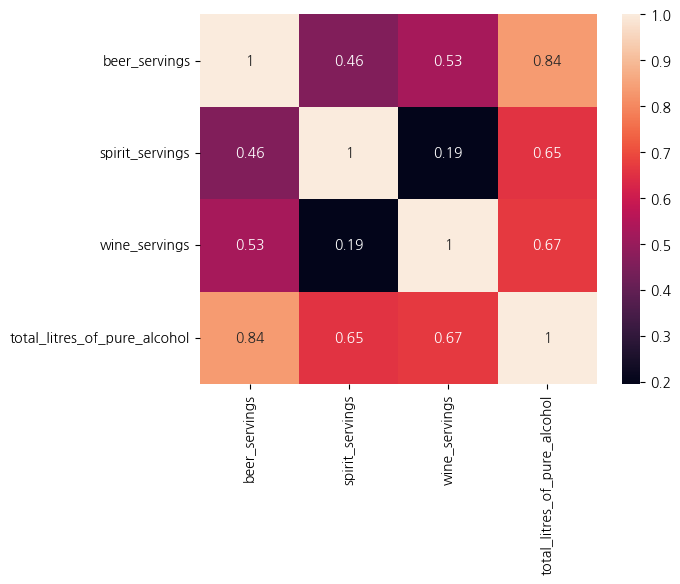

In [18]:
plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
#히트맵으로 시각화
#산점도로 시각화
#대륙별 결측값을 OT로 채우는 작업
# 대륙별 맥주 소비량의 최대 , 최소 , 평균 추출
sns.heatmap(corr , annot = True)

In [19]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [20]:
res = drinks.groupby('continent')['beer_servings'].agg(['max','min','mean'])
res

,max,min,mean
continent,,,
AF,376,0,61.471698
AS,247,0,37.045455
EU,361,0,193.777778
OC,306,0,89.687500
OT,285,1,145.434783
SA,333,93,175.083333


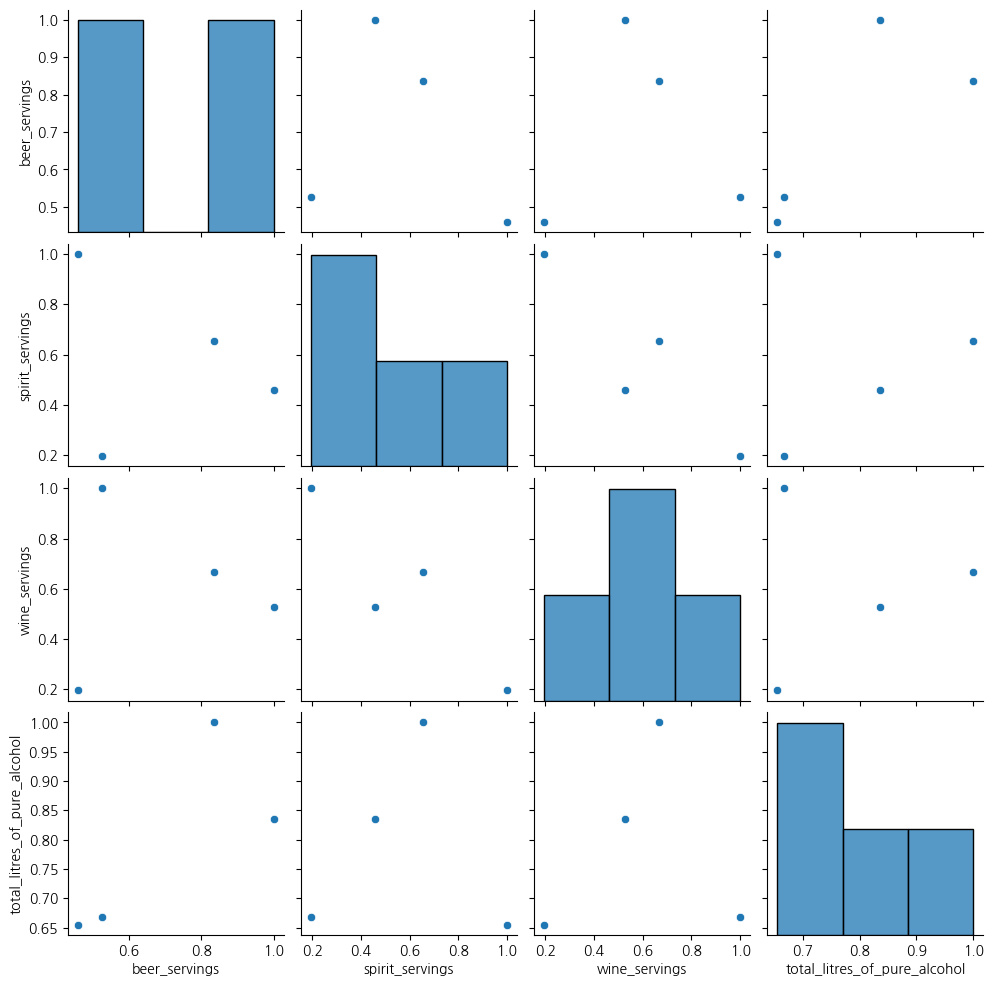

In [21]:
sns.pairplot(corr)

In [22]:
#평균 맥주 소비량이 가장 큰 대륙 : idxmax()
res['mean'].idxmax()

'EU'

In [23]:
# t-test : 차이검정
# 아프리카와 유럽 간의 맥주 소비량 차이 검정
from scipy import stats

In [24]:
africa = drinks.loc[drinks['continent']=='AF',:]
africa.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [25]:
Europe = drinks.loc[drinks['continent']=='EU',:]
Europe.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [26]:
africa.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [27]:
# 정규성 검사
# shapiro test
# p-value > 0.05면 귀무가설을 기각하지 않음 , 정규분포를 따른다고 할 수 있음

sha_a , sha_pvalue = stats.shapiro(africa[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])
print(sha_a , sha_pvalue)

0.49885445833206177 3.63404474322073e-24


In [28]:
#등분산성 검사 , levene test
lev_a , lev_pvalue = stats.levene(africa['beer_servings'] , Europe['beer_servings'])
print(lev_a , lev_pvalue)

6.015144059118397 0.015989187968374834


In [30]:
drinks.describe(include = 'object')

,country,continent
count,193,193
unique,193,6
top,Afghanistan,AF
freq,1,53


In [31]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [39]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

- 카이제곱 검정

In [43]:
data1 = [4,6,17,16,8,9]
data2 = [10,10,10,10,10,10]

In [44]:
#집단의 대표값
np.mean(data1) , np.mean(data2)

(10.0, 10.0)

In [46]:
# 카이제곱검정
e , p = stats.chisquare(data1 , data2)

- 귀무가설 : '무'로 돌아가는 가설(차이가 없다 , 같다)
- 대립가설 : 귀무가설의 반대(같지 않다 , 차이가 있다)

In [48]:
#p value가 0.05보다 크면 귀무가설을 채택 , 작으면 대립가설을 채택
if p>0.05:
  print('같음')
else:
  print('같지 않음')

같지 않음


- 차이검정

In [ ]:
# 단일표본 t검정
# 일반적으로 청소년의 신장은 175cm이다.
np.random.seed(100)
height = [180 + np.random.normal(0,5) for i in range(20)]
height

In [52]:
result = stats.ttest_1samp(height , 175)

In [53]:
result

TtestResult(statistic=5.665945996788414, pvalue=1.8373026341216103e-05, df=19)

- pvalue가 0.05보다 작으므로, 대립가설 채택 , 175와 같지 않다.

In [54]:
height = [180 + np.random.normal(0,5) for i in range(20)]
result = stats.ttest_1samp(height , 180)
result

TtestResult(statistic=0.22467912581985805, pvalue=0.8246275288355469, df=19)

 - 신장이 180cm라고 귀무가설을 수정하면, pvalue가 0.05보다 커지므로 귀무가설 채택 , 180과 같다고 할 수 있음.

In [55]:
#독립표본 t검정
height1 = [170 + np.random.normal(0,5) for i in range(20)]
height2 = [175 + np.random.normal(0,5) for i in range(20)]

In [59]:
# 등분산 가정
result1 = stats.ttest_ind(height1 , height2)
result1

TtestResult(statistic=-3.5702961669286704, pvalue=0.0009869209760117045, df=38.0)

In [60]:
#대응표본 t검정
before = [60 + np.random.normal(0,5) for w in range(20)]
print(before)
after = [60 + w*np.random.normal(0.99,0.02) for w in range(20)]
print(after)

[63.45060735112354, 63.43445033069202, 52.166562352108045, 64.52487060733341, 63.89411199661534, 62.1411643529837, 60.544359949489575, 60.141418174115366, 57.10587087604506, 54.00274400403035, 51.47023997130915, 61.84581978553503, 69.38286713481082, 58.115483249155126, 69.15968040912767, 60.01508717015607, 59.619882671376885, 60.019787969937994, 59.07492944551443, 47.56424232388615]
[60.0, 60.96727477986345, 61.86106738103796, 62.97199903668833, 63.94008890663535, 64.90498235649883, 65.95589133613785, 66.93310994992551, 67.97077887615058, 68.7745654480095, 69.64072163856997, 70.9109306775844, 71.77830837601358, 72.56164427311842, 73.75767064205054, 74.468693087746, 76.34757470029544, 77.06575282389564, 77.11509075568517, 78.75877550144381]


In [61]:
stats.ttest_rel(before , after)

TtestResult(statistic=-4.799755662672362, pvalue=0.0001245348251710736, df=19)

In [62]:
#아프리카와 유럽간의 맥주 소비량 차이를 검정
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [63]:
africa = drinks[drinks['continent']=='AF']
europe = drinks[drinks['continent']=='EU']

In [65]:
a = stats.ttest_ind(africa['beer_servings'] , europe['beer_servings'])
a

TtestResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11, df=96.0)

In [68]:
b = stats.ttest_ind(africa['beer_servings'] , europe['beer_servings'] , equal_var = False)
b

TtestResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10, df=84.40013075489844)